# Week 08

## Setup
<a name="setup"></a>

In [179]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
# Load basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [181]:
# Create a generic gradient function that takes any number of independent variables
def calculate_gradients(thetas, train_ex = []):
    '''
        thetas: theta0, theta1, ..., theta_n
        train_ex: (x, y), (x1, x2, y). (x1, x2, ..., x_n, y)
        
        returns: gradients based on a single training example
    '''
    # An intial array of constant 1 is concatenated with all train_ex values except last 
    variables = train_ex[0 : len(train_ex)-1]
    x_train = np.append(np.array([1.0]), variables)
    # The last train_ex value is assumed to be y, order matters
    y = float(train_ex[-1])

    # set y_hat to 0 to start
    y_hat = 0.0

    # Iterate over all x values and combine with thetas to produce final estimate
    for i in range(0, len(x_train)):
      y_hat += float(thetas[i]) * float(x_train[i])

    # calculate error from final estimate
    error = y_hat - y

    # for each theta, we need the gradient for an update
    gradients = []
    for x_i in x_train:
      gradients.append(error * float(x_i))
    # print(gradients)
    return np.array(gradients)

In [182]:
# Create a generic gradient descent function that handles any length
def gradient_descent(training_data, thetas, alpha=5e-3):
    '''
    training_data: training dataset
    thetas: theta0, theta1, ..., thetaj
    alpha: learning rate, default to 0.0005
    
    returns: 
            - thetas: the updated thetas
            - total_error: total error (note, not loss) from this iteration
    '''
    total_error = 0
    variables_count = len(training_data[0])
    overall_gradients = np.zeros(variables_count)

    # compute the summation of gradients across all training examples
    for ex in training_data:
        gradients = calculate_gradients(thetas, ex)
        # gradients[0] is the error term (gradients[0] = error * x0 = error * 1)
        total_error += gradients[0]
        overall_gradients = overall_gradients + gradients

    # update thetas
    for i in range(0, len(thetas)):
      thetas[i] = thetas[i] - alpha * overall_gradients[i]

    return thetas, total_error

In [183]:
# Create a generic error trajectory plot function
def plot_error_trajectory(error_trajectory, chart_name):
  plt.plot(error_trajectory)
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.title(chart_name);

In [184]:
# Create a generic least squares plot function
def plot_least_squares_comparison(start_thetas, final_thetas, x_data, y_data, 
                                  x_label = "X values", y_label = "Y values",
                                  title = "Before & After Model Training", 
                                  line_length = 25):
  # Generate range of points to apply against thetas to create a line
  lin_pts = np.linspace(0, line_length, 25)

  # Plot the original least squares, i.e. starting line
  orig_mdl_pts = start_thetas[0] + lin_pts * start_thetas[1]
  plt.plot(lin_pts, orig_mdl_pts, ':', linewidth=4, label='Original model fit')
  plt.legend()

  # Plot the final leat squares, i.e. model fit line
  mdl_pts = final_thetas[0] + lin_pts * final_thetas[1]
  plt.plot(lin_pts, mdl_pts, linewidth=4, label='Final model fit')
  plt.legend()

  # Draw a scatter plot of the data that fit the model
  plt.plot(x_data, y_data, 'ro', label='Data points') # 'ro' for red, circle
  plt.legend()
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)

## Part 1

### Load Data

In [185]:
# Load Data
food_truck_data_path = '/content/drive/MyDrive/Vanderbilt/Classes/Fall 2022/Machine Learning/Assignments/Assignment Week 8/food_truck_data.txt'
food_truck_data = pd.read_csv(food_truck_data_path, header = None, names=['population', 'profit'])
food_truck_data.info()
food_truck_data.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Perform Gradient Descent

In [186]:
# set initial parameters
thetas = [0.5, 1]
old_thetas = thetas.copy()
alpha = 5e-6

# prepare training
total_epochs = 300
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(food_truck_data.to_numpy(), thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error


In [187]:
print(thetas)

[0.3621204076834167, 0.7652825150085518]


### Evaluate Results

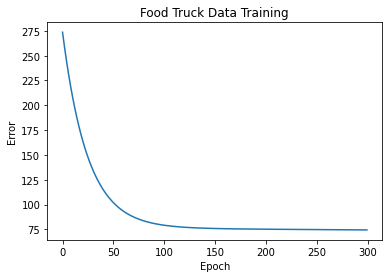

In [188]:
# Let's do an exploratory plot
plot_error_trajectory(error_traj, 'Food Truck Data Training')

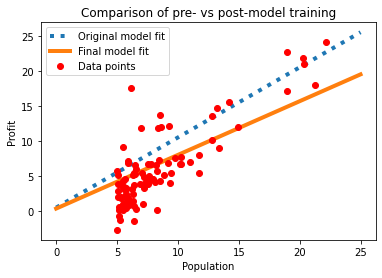

In [189]:
# Plot a comparison of the fit line before and after modle training
x_data = food_truck_data.to_numpy()[:,0]
y_data = food_truck_data.to_numpy()[:,1]
x_label = 'Population'
y_label = 'Profit'
title = 'Comparison of pre- vs post-model training'
plot_least_squares_comparison(old_thetas, thetas, x_data, y_data, x_label, y_label, title)

### Part 1 Summary

Data is loaded from Google Drive. Care is taken to specify that the data has no headers in the file, and the column names must be specified manually. The data comes already scaled, although there doesn't appear to be any information as to what the prior scale was.

Using the generic functions created during [Setup](#setup), a linear regression model using gradient descent is fit to the food truck data. The `Population` is provided as the input, and a prediction of `Profit` is the output.

By comparing the predicted `Profit` vs the actual `Profit` in the training data, the error is the difference between the two. Using this error, the coefficients of the linear equation can be updated iteratively to reduce the error.

## Part 2

### Load Data

In [190]:
# Load Data
house_price_data_path = '/content/drive/MyDrive/Vanderbilt/Classes/Fall 2022/Machine Learning/Assignments/Assignment Week 8/housing_price_data.txt'
housing_price_data = pd.read_csv(house_price_data_path, header=None, names=['SqFt', 'NumRooms', 'Price'])
housing_price_data.info()
housing_price_data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   SqFt      47 non-null     int64
 1   NumRooms  47 non-null     int64
 2   Price     47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB


,SqFt,NumRooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Feature Scaling

In [191]:
def create_min_max_scaler(min, max):
  return lambda x: (x - min) / (max - min)

def min_max_scale_dataframe_column(df, column):
  min = df[column].min()
  max = df[column].max()
  min_max_scaler = create_min_max_scaler(min, max)
  df[column] = df[column].apply(min_max_scaler)
  return df

housing_price_data = min_max_scale_dataframe_column(housing_price_data, 'SqFt')
housing_price_data = min_max_scale_dataframe_column(housing_price_data, 'NumRooms')
housing_price_data = min_max_scale_dataframe_column(housing_price_data, 'Price')

In [192]:
housing_price_data.head(5)

,SqFt,NumRooms,Price
0,0.345284,0.50,0.433962
1,0.206288,0.50,0.301887
2,0.426917,0.50,0.375660
3,0.155543,0.25,0.117170
4,0.592388,0.75,0.698113


### Perform Gradient Descent

In [193]:
# set initial parameters
thetas = [1, 2, 1]
old_thetas = thetas.copy()
alpha = 5e-4

# prepare training
total_epochs = 300
error_traj = [0] * total_epochs

# perform training
for epoch in range(total_epochs):
    thetas, epoch_error = gradient_descent(housing_price_data.to_numpy(), thetas, alpha)
    # store a history of errors
    error_traj[epoch] = epoch_error

In [194]:
print(thetas)

[-0.21628257081393573, 1.3757245965979155, 0.16432823286953213]


### Evaluate Results

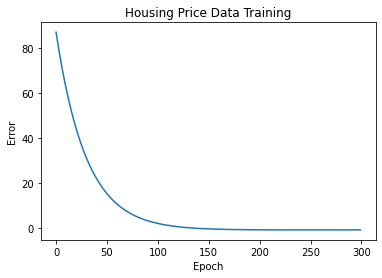

In [195]:
# Let's do an exploratory plot
plot_error_trajectory(error_traj, 'Housing Price Data Training')

### Part 2 Summary

Data is again loaded from Google Drive. Care is taken to specify that the data has no headers in the file, and the column names must be specified manually. 

The data is not scaled in its raw format. A min-max scaler is applied to all columns of the dataframe, `SqFt`, `NumRooms`, and `Price`. 

Using the generic functions created during [Setup](#setup), a linear regression model using gradient descent is fit to the food truck data. The `SqFt` and `NumRooms` are provided as the inputs, and a prediction of `Price` is the output.

By comparing the predicted `Price` vs the actual `Price` in the training data, the error is the difference between the two. Using this error, the coefficients of the linear equation can be updated iteratively to reduce the error.